# Défi de prédiction de désabonnement Expresso
Pouvez-vous prédire quand un client de temps d'antenne passera à un autre fournisseur ?

**La description**

Expresso est une société de télécommunications africaine qui fournit à ses clients des forfaits de temps d'antenne et de données mobiles. L'objectif de ce défi est de développer un modèle d'apprentissage automatique pour prédire la probabilité que chaque client d'Expresso « tourne », c'est-à-dire qu'il devienne inactif et n'effectue aucune transaction pendant 90 jours.

**À propos**

Les données décrivent 2,5 millions de clients Expresso.

L'objectif de ce hackathon est de développer un modèle prédictif qui détermine la probabilité pour 
un client d'arrêter d'acheter du temps d'antenne et des données à Expresso.

**Fichiers disponibles en téléchargement**

**Train.csv** - contient des informations sur 2 millions de clients. Il y a une colonne appelée CHURN qui indique si un client s'est désabonné ou n'a pas désabonné.
C'est la cible. Vous devez estimer la probabilité que ces clients se soient détournés. 
Vous utiliserez ce fichier pour entraîner votre modèle.

**Test.csv** - est similaire à train, mais sans la colonne Churn. Vous utiliserez ce fichier pour tester votre modèle.

**SampleSubmission.csv** - est un exemple de ce à quoi votre soumission devrait ressembler. 
L'ordre des lignes n'a pas d'importance mais le nom de l'user_id doit être correct.

Évaluation

La métrique d'évaluation pour ce défi est l'aire sous la courbe (AUC).

Les valeurs peuvent être comprises entre 0 et 1 inclus. Où 1 indique que le client s'est retiré et 0 indique que le client est resté chez Expresso.

Le fichier de soumission est volumineux, veuillez vous attendre à un temps de notation plus long.



In [12]:
#Importer des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [13]:
#Pour plus de facilité, j'ai mis les données dans mon drive
#importer les données depuis my drive en utilisatnt le lien
# Enfin utiliser la machine virtuelle de google colab
train = pd.read_csv('/content/drive/MyDrive/projet_ia/Train.csv')
test=  pd.read_csv('/content/drive/MyDrive/projet_ia/Test.csv')
submission = pd.read_csv('/content/drive/MyDrive/projet_ia/SampleSubmission.csv')

### Visualisation et Nettoyage des données

In [14]:
# Visualisation des données du train
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [15]:
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0
2154047,fffff6dbff1508ea2bfe814e5ab2729ce6b788c2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NO,62,NaN,NaN,1


In [16]:
# voir le nombre de colonne et de ligne
train.shape

(2154048, 19)

In [17]:
#voir les types de données dans les données du train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [18]:
# Visualisation des données du test
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [19]:
test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NaN,NaN,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NaN,NaN,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NaN,NaN,NO,29,"Data: 100 F=40MB,24H",11.0
380126,ffffb393b346f5348034e6e22be93778d94d4beb,DIOURBEL,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NO,20,NaN,NaN


In [20]:
# voir le nombre de colonne et de ligne
test.shape

(380127, 18)

In [21]:
#voir les types de données dans les données du test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          230399 non-null  object 
 2   TENURE          380127 non-null  object 
 3   MONTANT         247072 non-null  float64
 4   FREQUENCE_RECH  247072 non-null  float64
 5   REVENUE         252754 non-null  float64
 6   ARPU_SEGMENT    252754 non-null  float64
 7   FREQUENCE       252754 non-null  float64
 8   DATA_VOLUME     193087 non-null  float64
 9   ON_NET          241613 non-null  float64
 10  ORANGE          222897 non-null  float64
 11  TIGO            153126 non-null  float64
 12  ZONE1           29861 non-null   float64
 13  ZONE2           24076 non-null   float64
 14  MRG             380127 non-null  object 
 15  REGULARITY      380127 non-null  int64  
 16  TOP_PACK        221348 non-null  object 
 17  FREQ_TOP_P

In [22]:
# Visualisation des données de la submission
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [23]:
# voir le nombre de colonne et de ligne
submission.shape

(380127, 2)

DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

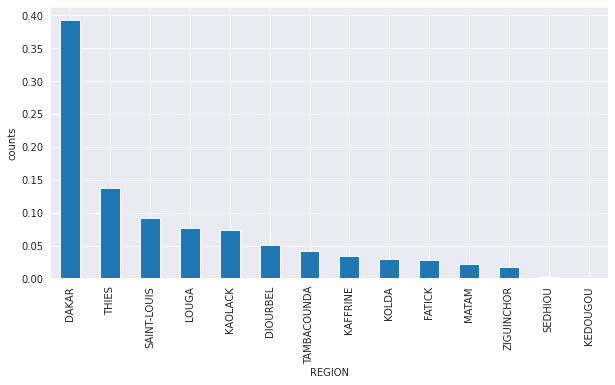

In [24]:
#Vérifiez combien de niveaux sont impliqués dans chacune des caractéristiques catégorielles (objet)
print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

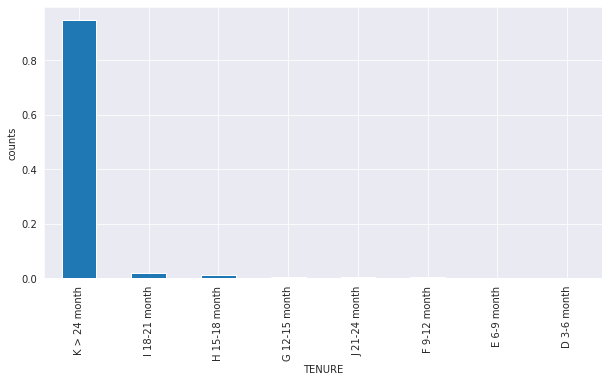

In [25]:
print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    2154048
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

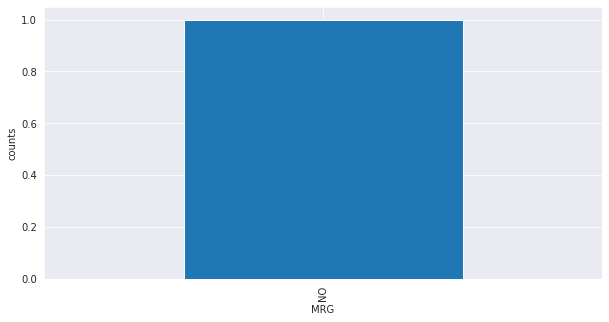

In [26]:
print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

All-net 500F=2000F;5d             317802
On net 200F=Unlimited _call24H    152295
Data:490F=1GB,7d                  115180
Data: 100 F=40MB,24H               84649
Mixt 250F=Unlimited_call24H        67512
                                   ...  
CVM_150F_unlimited                     1
YMGX on-net 100=700F, 24H              1
Postpaid FORFAIT 10H Package           1
pilot_offer5                           1
Package3_Monthly                       1
Name: TOP_PACK, Length: 140, dtype: int64


Text(0.5, 0, 'TOP_PACK')

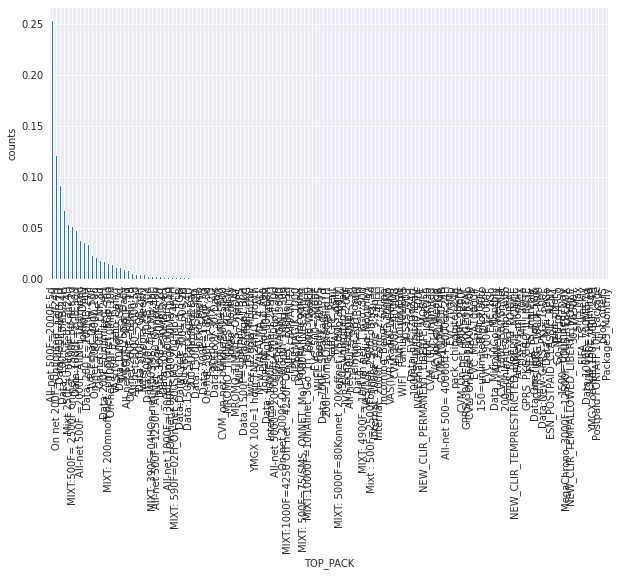

In [27]:
#probablement pas la meilleure façon de visualiser cela
print(train['TOP_PACK'].value_counts())
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

0    1750062
1     403986
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

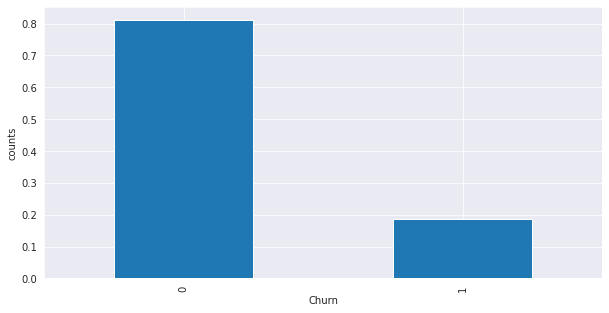

In [28]:
#Vérifiez si la classe de prédicteur est équilibrée
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [29]:
#Vérifier le résumé des champs numériques
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [30]:
#Vérifier les valeurs manquantes dans les données d'entraînement
train.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [31]:
#Vérifier les valeurs manquantes dans les données de test
test.isnull().sum()

user_id                0
REGION            149728
TENURE                 0
MONTANT           133055
FREQUENCE_RECH    133055
REVENUE           127373
ARPU_SEGMENT      127373
FREQUENCE         127373
DATA_VOLUME       187040
ON_NET            138514
ORANGE            157230
TIGO              227001
ZONE1             350266
ZONE2             356051
MRG                    0
REGULARITY             0
TOP_PACK          158779
FREQ_TOP_PACK     158779
dtype: int64

In [32]:
#Nous supprimerons REGION, TOP_PACK et MRG
#Nous remplacerons également les valeurs manquantes pour les colonnes numériques par leurs moyennes (moyennes)

In [33]:
#supprimez ces colonnes dans le train
train.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True) 

In [34]:
# Revisualiser les données aprés suppréssion
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,17,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,62,11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,11,2.0,0


In [35]:
#supprimez ces colonnes dans le test
test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

In [36]:
# Revisualiser les données aprés suppréssion
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,42,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,41,1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,57,22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN


In [37]:
# Remplacer les valeurs manquantes par la moyenne sur toutes les colonnes du train
train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [38]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.000000,15.00000,4251.000000,1417.000000,17.000000,4.000000,388.00000,46.000000,1.000000,1.000000,2.000000,54,8.000000,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,95.418711,23.109253,8.170132,7.553309,4,9.272461,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.000000,2.00000,1020.000000,340.000000,2.000000,3366.450167,90.00000,46.000000,7.000000,8.170132,7.553309,17,1.000000,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.000000,15.00000,13502.000000,4501.000000,18.000000,43804.000000,41.00000,102.000000,2.000000,8.170132,7.553309,62,11.000000,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.000000,1.00000,985.000000,328.000000,1.000000,3366.450167,39.00000,24.000000,23.109253,8.170132,7.553309,11,2.000000,0


In [39]:
# Vérifier s'il y a des données nulles 
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [40]:
# Remplacer les valeurs manquantes par la moyenne sur toutes les colonnes du test
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [41]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.000000,5.000000,5000.000000,1667.000000,5.000000,3346.095454,378.00000,11.000000,5.000000,8.164663,7.6553,42,5.000000
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.000000,2.000000,326.000000,109.000000,3.000000,397.000000,278.80631,0.000000,23.052088,8.164663,7.6553,41,1.000000
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.000000,25.000000,3400.000000,1133.000000,26.000000,7150.000000,0.00000,2.000000,5.000000,8.164663,7.6553,57,22.000000
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,8.164663,7.6553,9,9.261584
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,95.193008,23.052088,8.164663,7.6553,10,9.261584


In [42]:
# Vérifier s'il y a des données nulles 
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

##Machine learning


In [9]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [43]:
# importation 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

In [44]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)# supprimé les 2 variables dans le train
test = test.drop(columns=['user_id'], axis=1) #vous l'utiliserez pour prédire et soumettre le résultat
print(x.shape)
print(y.shape)
print(test.shape)

(2154048, 14)
(2154048,)
(380127, 14)


In [45]:
# Diviser les données d'entraînement en fraction d'entraînement et de test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state=1)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1077024, 14)
(1077024,)
(1077024, 14)
(1077024,)


In [46]:
#Ensuite, divisez X_train et y_train en ensembles de train et de validation
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.3, random_state=1)

In [47]:
print("train")
print(X_train.shape)
print(y_train.shape)
print("_"*7)
print("test")
print(X_test.shape)
print(y_test.shape)
print("_"*7)
print("validation")
print(X_val.shape)
print(y_val.shape)

train
(753916, 14)
(753916,)
_______
test
(1077024, 14)
(1077024,)
_______
validation
(323108, 14)
(323108,)


In [48]:
#Standardiser les colonnes numériques
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']

In [49]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
829510,K > 24 month,-0.775034,-0.611459,-0.755022,-0.754855,-0.750871,-0.358105,-0.370788,-0.495765,-0.583063,-0.678894,-0.000554,1.522906,-0.779625
693020,K > 24 month,0.000360,0.000902,0.000552,0.000552,0.000907,0.000157,0.000446,-0.000412,0.001901,0.001059,-0.000554,-0.989467,0.001192
1177807,K > 24 month,0.000360,0.000902,-0.924952,-0.924957,-1.085808,0.000157,0.000446,-0.000412,0.001901,0.001059,-0.000554,-1.213786,0.001192
40576,K > 24 month,0.000360,0.000902,0.000552,0.000552,0.000907,-0.357998,0.000446,-0.000412,0.001901,0.001059,-0.000554,-0.451101,0.001192
1023530,K > 24 month,-0.783781,-0.892827,-0.862770,-0.862774,-0.750871,-0.230932,-0.399600,-0.534155,0.001901,0.001059,-0.000554,-0.989467,-0.886992


In [50]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
417912,K > 24 month,5.505631,0.889169,5.582754,5.582587,1.007548,-0.165163,1.506348,6.836756,3.922643,0.001059,-0.000554,1.522906,2.548730
1380278,K > 24 month,-0.355157,-0.423880,-0.343901,-0.343733,-0.583403,0.000157,-0.356382,-0.035083,-0.405872,0.001059,-0.000554,-0.226782,-0.242794
657158,K > 24 month,0.000360,0.000902,0.000552,0.000552,0.000907,0.000157,0.000446,-0.000412,0.001901,0.001059,-0.000554,-0.181919,0.001192
228934,I 18-21 month,0.000360,0.000902,0.000552,0.000552,0.000907,0.000157,0.000446,-0.000412,0.001901,0.001059,-0.000554,-1.213786,0.001192
2020145,K > 24 month,2.199097,0.420223,2.157086,2.156915,0.253940,0.000157,0.120466,0.636745,-0.507124,0.001059,-0.000554,1.119131,0.830869


In [51]:
test[num_cols] = scaler.transform(test[num_cols])
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,K > 24 month,-0.092733,-0.611459,-0.086950,-0.086782,-0.750871,-0.002009,0.144956,-0.540553,-0.456498,0.00054,0.011407,0.625630,-0.457526
1,I 18-21 month,-0.914993,-0.892827,-0.887609,-0.887442,-0.918340,-0.315856,0.002055,-0.610935,0.000454,0.00054,0.011407,0.580766,-0.886992
2,K > 24 month,-0.390146,1.264326,-0.361031,-0.361206,1.007548,0.402807,-0.399600,-0.598139,-0.456498,0.00054,0.011407,1.298587,1.367700
3,K > 24 month,-0.000892,0.000033,-0.001355,-0.001355,-0.000783,-0.002009,0.002055,-0.001856,0.000454,0.00054,0.011407,-0.854876,0.000024
4,K > 24 month,-0.000892,0.000033,-0.001355,-0.001355,-0.000783,-0.002009,0.002055,-0.001856,0.000454,0.00054,0.011407,-0.810012,0.000024


In [52]:
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_val.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
668814,K > 24 month,0.000360,0.000902,0.000552,0.000552,0.000907,0.000157,0.000446,-0.000412,0.001901,0.001059,-0.000554,-0.989467,0.001192
1273739,K > 24 month,-0.670065,-0.517670,-0.745772,-0.745605,-0.080997,-0.357892,-0.399600,-0.566147,-0.532437,0.001059,-0.000554,-0.271646,0.001192
494342,K > 24 month,0.956960,-0.799037,2.350142,2.350142,-0.415934,3.992607,0.022503,-0.265424,0.429455,1.691886,-0.000554,1.522906,-0.672259
1933861,K > 24 month,-0.845013,-0.517670,-0.841186,-0.841191,-0.583403,0.000157,-0.392397,-0.000412,0.001901,0.001059,-0.000554,0.356447,0.001192
1369873,K > 24 month,-0.932488,-0.892827,-0.913818,-0.913651,-1.002074,0.000157,-0.398160,-0.610935,0.001901,0.001059,-0.000554,0.580766,0.001192


In [53]:
#Encoder la colonne TENURE
encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])
X_test["TENURE"] = encoder.transform(X_test["TENURE"])
X_val['TENURE'] = encoder.transform(X_val["TENURE"])
test['TENURE'] = encoder.transform(test["TENURE"])
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
829510,7,-0.775034,-0.611459,-0.755022,-0.754855,-0.750871,-0.358105,-0.370788,-0.495765,-0.583063,-0.678894,-0.000554,1.522906,-0.779625
693020,7,0.000360,0.000902,0.000552,0.000552,0.000907,0.000157,0.000446,-0.000412,0.001901,0.001059,-0.000554,-0.989467,0.001192
1177807,7,0.000360,0.000902,-0.924952,-0.924957,-1.085808,0.000157,0.000446,-0.000412,0.001901,0.001059,-0.000554,-1.213786,0.001192
40576,7,0.000360,0.000902,0.000552,0.000552,0.000907,-0.357998,0.000446,-0.000412,0.001901,0.001059,-0.000554,-0.451101,0.001192
1023530,7,-0.783781,-0.892827,-0.862770,-0.862774,-0.750871,-0.230932,-0.399600,-0.534155,0.001901,0.001059,-0.000554,-0.989467,-0.886992


## Introduction sur l'algorithme Catboost

**CatBoost ou Categorical Boosting** est une bibliothèque de boost open source développée par Yandex. En plus de la régression et de la classification, CatBoost peut être utilisé dans le classement, les systèmes de recommandation, les prévisions et même les assistants personnels.


Contrairement à certains autres algorithmes d'apprentissage automatique , CatBoost fonctionne bien avec un petit ensemble de données. 

Cependant, il est conseillé de faire attention au surajustement . Un petit ajustement des paramètres pourrait être nécessaire ici.

**Lorsque vous travaillez sur un ensemble de données catégorielles**

CatBoost est incroyablement plus rapide que de nombreux autres algorithmes d'apprentissage automatique. Le fractionnement, la structure arborescente et le processus de formation sont optimisés pour être plus rapides sur le GPU et le CPU. 

L'entraînement sur GPU est 40 fois plus rapide que sur CPU, deux fois plus rapide que LightGBM et 20 fois plus rapide que XGBoost.

**Quand ne pas utiliser CatBoost**

Il n'y a pas beaucoup d'inconvénients à utiliser CatBoost pour n'importe quel ensemble de données. 

Jusqu'à présent, le problème pour lequel beaucoup n'envisagent pas d'utiliser CatBoost est dû à la légère difficulté à régler les paramètres pour optimiser le modèle pour les caractéristiques catégorielles.

### Implémentation pratique de l'algorithme CatBoost en Python sur ce Model

In [46]:
## Importez le CatBoostClassifier pour l'adapter au modèle et exécutez une prédiction
model = CatBoostClassifier() 

In [47]:
#Ajuster le modèle aux données
Catmodel = model.fit(X_train,y_train)

Learning rate set to 0.174402
0:	learn: 0.5266130	total: 207ms	remaining: 3m 26s
1:	learn: 0.4384317	total: 380ms	remaining: 3m 9s
2:	learn: 0.3864180	total: 531ms	remaining: 2m 56s
3:	learn: 0.3571587	total: 726ms	remaining: 3m
4:	learn: 0.3376132	total: 967ms	remaining: 3m 12s
5:	learn: 0.3225109	total: 1.1s	remaining: 3m 3s
6:	learn: 0.3164075	total: 1.25s	remaining: 2m 57s
7:	learn: 0.3116998	total: 1.41s	remaining: 2m 54s
8:	learn: 0.3071511	total: 1.55s	remaining: 2m 51s
9:	learn: 0.3050830	total: 1.7s	remaining: 2m 48s
10:	learn: 0.3022334	total: 1.84s	remaining: 2m 45s
11:	learn: 0.3013030	total: 1.98s	remaining: 2m 43s
12:	learn: 0.3004905	total: 2.13s	remaining: 2m 42s
13:	learn: 0.2993877	total: 2.26s	remaining: 2m 39s
14:	learn: 0.2987325	total: 2.41s	remaining: 2m 38s
15:	learn: 0.2980872	total: 2.55s	remaining: 2m 36s
16:	learn: 0.2976010	total: 2.69s	remaining: 2m 35s
17:	learn: 0.2974368	total: 2.83s	remaining: 2m 34s
18:	learn: 0.2970870	total: 2.98s	remaining: 2m 33s


In [48]:
#Prédire sur les données X_test
PredModel = model.predict(X_test)

In [51]:
#optimisons le model 
#parametre du grid
params=[
    {'iterations':[10,52,100]},
    {'learning_rate':[1,4,0.5]},
    {'random_seed':[24,12,42]},
    {'eval_metric':['Accuracy']},
]
##instantiation du model
cat_best_model = GridSearchCV(model,params,cv=5,verbose=16)
cat_best_model.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
10:	learn: 0.2960351	total: 1.2s	remaining: 1m 48s
11:	learn: 0.2958514	total: 1.31s	remaining: 1m 47s
12:	learn: 0.2956612	total: 1.42s	remaining: 1m 48s
13:	learn: 0.2954049	total: 1.54s	remaining: 1m 48s
14:	learn: 0.2952733	total: 1.65s	remaining: 1m 48s
15:	learn: 0.2952088	total: 1.75s	remaining: 1m 47s
16:	learn: 0.2950974	total: 1.88s	remaining: 1m 48s
17:	learn: 0.2949201	total: 1.99s	remaining: 1m 48s
18:	learn: 0.2948185	total: 2.1s	remaining: 1m 48s
19:	learn: 0.2947361	total: 2.2s	remaining: 1m 48s
20:	learn: 0.2945867	total: 2.32s	remaining: 1m 48s
21:	learn: 0.2944879	total: 2.43s	remaining: 1m 47s
22:	learn: 0.2944254	total: 2.55s	remaining: 1m 48s
23:	learn: 0.2943386	total: 2.67s	remaining: 1m 48s
24:	learn: 0.2942514	total: 2.79s	remaining: 1m 48s
25:	learn: 0.2940701	total: 2.91s	remaining: 1m 49s
26:	learn: 0.2939566	total: 3.01s	remaining: 1m 48s
27:	learn: 0.2938505	total: 3.11s	remaining: 1m 48s
28:	learn: 0.293

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.6204075	total: 108ms	remaining: 1m 48s
1:	learn: 9.6430233	total: 210ms	remaining: 1m 44s
2:	learn: 13.4387502	total: 320ms	remaining: 1m 46s
3:	learn: 35.3281611	total: 421ms	remaining: 1m 44s


Training has stopped (degenerate solution on iteration 4, probably too small l2-regularization, try to increase it)
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


[CV 1/5; 5/10] END .............learning_rate=4;, score=0.823 total time=   1.0s
[CV 2/5; 5/10] START learning_rate=4............................................
0:	learn: 0.6199839	total: 107ms	remaining: 1m 46s
1:	learn: 9.7121914	total: 212ms	remaining: 1m 45s
2:	learn: 17.1610019	total: 324ms	remaining: 1m 47s
3:	learn: 50.9134965	total: 429ms	remaining: 1m 46s
4:	learn: 52.0442587	total: 528ms	remaining: 1m 45s
[CV 2/5; 5/10] END .............learning_rate=4;, score=0.847 total time=   1.0s
[CV 3/5; 5/10] START learning_rate=4............................................


Training has stopped (degenerate solution on iteration 5, probably too small l2-regularization, try to increase it)
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.6208807	total: 110ms	remaining: 1m 49s
1:	learn: 3.7151242	total: 222ms	remaining: 1m 50s
2:	learn: 3.7082197	total: 343ms	remaining: 1m 53s
3:	learn: 14.9339809	total: 453ms	remaining: 1m 52s
4:	learn: 18.1883565	total: 568ms	remaining: 1m 53s
[CV 3/5; 5/10] END .............learning_rate=4;, score=0.640 total time=   1.1s
[CV 4/5; 5/10] START learning_rate=4............................................


Training has stopped (degenerate solution on iteration 5, probably too small l2-regularization, try to increase it)
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.6202061	total: 116ms	remaining: 1m 56s
1:	learn: 10.0631224	total: 220ms	remaining: 1m 49s
2:	learn: 16.9324955	total: 324ms	remaining: 1m 47s
3:	learn: 46.4210521	total: 428ms	remaining: 1m 46s


Training has stopped (degenerate solution on iteration 4, probably too small l2-regularization, try to increase it)
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


[CV 4/5; 5/10] END .............learning_rate=4;, score=0.856 total time=   1.0s
[CV 5/5; 5/10] START learning_rate=4............................................
0:	learn: 0.6206809	total: 107ms	remaining: 1m 46s
1:	learn: 9.8061273	total: 209ms	remaining: 1m 44s
2:	learn: 15.7015792	total: 321ms	remaining: 1m 46s
3:	learn: 36.6505156	total: 436ms	remaining: 1m 48s
4:	learn: 19.4310682	total: 544ms	remaining: 1m 48s
[CV 5/5; 5/10] END .............learning_rate=4;, score=0.858 total time=   1.0s
[CV 1/5; 6/10] START learning_rate=0.5..........................................


Training has stopped (degenerate solution on iteration 5, probably too small l2-regularization, try to increase it)


Streaming output truncated to the last 5000 lines.
114:	learn: 0.8664156	total: 15.3s	remaining: 1m 57s
115:	learn: 0.8664190	total: 15.5s	remaining: 1m 57s
116:	learn: 0.8664173	total: 15.6s	remaining: 1m 57s
117:	learn: 0.8664206	total: 15.7s	remaining: 1m 57s
118:	learn: 0.8664339	total: 15.8s	remaining: 1m 57s
119:	learn: 0.8664405	total: 16s	remaining: 1m 57s
120:	learn: 0.8664090	total: 16.1s	remaining: 1m 57s
121:	learn: 0.8664090	total: 16.3s	remaining: 1m 56s
122:	learn: 0.8664156	total: 16.4s	remaining: 1m 56s
123:	learn: 0.8664272	total: 16.5s	remaining: 1m 56s
124:	learn: 0.8664256	total: 16.6s	remaining: 1m 56s
125:	learn: 0.8664571	total: 16.8s	remaining: 1m 56s
126:	learn: 0.8664571	total: 16.9s	remaining: 1m 56s
127:	learn: 0.8664521	total: 17s	remaining: 1m 56s
128:	learn: 0.8664521	total: 17.1s	remaining: 1m 55s
129:	learn: 0.8664604	total: 17.3s	remaining: 1m 55s
130:	learn: 0.8664621	total: 17.4s	remaining: 1m 55s
131:	learn: 0.8665151	total: 17.6s	remaining: 1m 55s

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f209a81c410>,
             param_grid=[{'iterations': [10, 52, 100]},
                         {'learning_rate': [1, 4, 0.5]},
                         {'random_seed': [24, 12, 42]},
                         {'eval_metric': ['Accuracy']}],
             verbose=16)

In [52]:
#parametres optionnaux
cat_best_model.best_params_

{'iterations': 100}

In [53]:
#model optimal
cat_best_model.best_estimator_

In [54]:
#meilleur score
cat_best_model.best_score_

0.8659346655738596

In [55]:
# Making a submission
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [56]:
subpred = Catmodel.predict(test)
subpred

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
submission["CHURN"] = subpred
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


### Appliquons un modele du plus proche voisins (K-NN)

In [54]:
#instanciation
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn
#fitting du model
knn.fit(X_train,y_train)
#prediction
pred_knn = knn.predict(X_test)

In [56]:
#Calculons le taux d'accuracy
knn_acc = accuracy_score(y_test,pred_knn)
print('le taux accuracy knn est de', knn_acc) 

le taux accuracy knn est de 0.8561889057254063


## Appliquons un modele de regression Logistic

In [57]:
#instanciation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr
#fitting du model
lr.fit(X_train,y_train)
#prediction
pred_lr = lr.predict(X_test)

In [58]:
#Calculons le taux d'accuracy
lr_acc = accuracy_score(y_test,pred_lr)
print('le taux accuracy de regression logistique est de', lr_acc)

le taux accuracy de regression logistique est de 0.8575779184122174


### Appliquons un modele de Naive Bayesian

In [59]:
# Appliquons un modele de Naive Bayesian
#instanciation du model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
#fitting du model
gnb.fit(X_train,y_train)
#predictions du model
pred_gnb = gnb.predict(X_test)

In [60]:
#Calculons le taux d'accuracy
gnb_acc = accuracy_score(y_test,pred_gnb)
print('le taux accuracy de Naive Bayesian est de', gnb_acc)

le taux accuracy de Naive Bayesian est de 0.6575303800101019


## Appliquons un modele d'Arbre de decision

In [61]:
#Appliquons un modele d'Arbre de decision
#instanciation du model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
#fitting du model
dtc.fit(X_train,y_train)
#predictions du model
pred_dtc = dtc.predict(X_test)

In [62]:
#Calculons le taux d'accuracy
dtc_acc = accuracy_score(y_test,pred_dtc)
print("le taux accuracy de l'Arbre de decision est de", dtc_acc)

le taux accuracy de l'Arbre de decision est de 0.8380769602162997


## Choisissons le best modele et interpretons ces resultats

In [65]:
t_best = [
    {"Le score de knn":knn_acc},
    {"Le score de lr":lr_acc},
    {"Le score de gnb":gnb_acc},
    {"Le score de dtc":dtc_acc}
]
t_best

[{'Le score de knn': 0.8561889057254063},
 {'Le score de lr': 0.8575779184122174},
 {'Le score de gnb': 0.6575303800101019},
 {'Le score de dtc': 0.8380769602162997}]

Comparer avec tous ces models Catboost donne le meilleur modéle avec un score de 0,86 